<a href="https://colab.research.google.com/github/Naveenreddy2711999/Balancing-the-Imbalance-SMOTE-vs.-ADASYN-in-IoT-Machine-Learning-Applications/blob/main/SMOTE_vs_ADASYN_IoT_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os

path = "/content/drive/My Drive/bot iot data set"

print("Trying dataset folder:", path)
exists = os.path.isdir(path)
print("Folder exists?", exists)
if exists:
    files = sorted([f for f in os.listdir(path) if f.endswith('.csv')])
    print("CSV count:", len(files))
    print("First 10 CSV files:", files[:10])
else:
    print("Folder not found")


Trying dataset folder: /content/drive/My Drive/bot iot data set
Folder exists? True
CSV count: 75
First 10 CSV files: ['data_1.csv', 'data_10.csv', 'data_11.csv', 'data_12.csv', 'data_13.csv', 'data_14.csv', 'data_15.csv', 'data_16.csv', 'data_17.csv', 'data_18.csv']


In [7]:
import pandas as pd
from tqdm import tqdm
import os

data_dir = "/content/drive/My Drive/bot iot data set"
output_path = "/content/drive/My Drive/bot_iot_merged.csv"

files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')])

print(f"Found {len(files)} CSV files. Merging incrementally...")
first = True

for f in tqdm(files, desc="Merging CSVs"):
    df = pd.read_csv(f)
    if df.empty:
        continue
    df["source_file"] = os.path.basename(f)
    df.to_csv(output_path, mode='w' if first else 'a', index=False, header=first)
    first = False

print("✅ Merged successfully:", output_path)


Found 75 CSV files. Merging incrementally...


Merging CSVs:   0%|          | 0/75 [00:00<?, ?it/s]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:   8%|▊         | 6/75 [04:51<35:12, 30.62s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:   9%|▉         | 7/75 [05:13<31:46, 28.03s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:  11%|█         | 8/75 [05:36<29:17, 26.23s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
Merging CSVs:  12%|█▏        | 9/75 [06:01<28:29, 25.90s/it]/tmp/ipython-input-4121393418.py:14: DtypeWarning: Columns (5,7)

✅ Merged successfully: /content/drive/My Drive/bot_iot_merged.csv


In [8]:
!ls -lh "/content/drive/My Drive/bot_iot_merged.csv"


-rw------- 1 root root 15G Dec 17 15:48 '/content/drive/My Drive/bot_iot_merged.csv'


In [9]:
import pandas as pd
file_path = "/content/drive/My Drive/bot_iot_merged.csv"
df_sample = pd.read_csv(file_path, nrows=1000000)
df_sample.head(), df_sample.info()

/tmp/ipython-input-2929358687.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv(file_path, nrows=1000000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 36 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   pkSeqID       1000000 non-null  int64  
 1   stime         1000000 non-null  float64
 2   flgs          1000000 non-null  object 
 3   proto         1000000 non-null  object 
 4   saddr         1000000 non-null  object 
 5   sport         999513 non-null   object 
 6   daddr         1000000 non-null  object 
 7   dport         999513 non-null   object 
 8   pkts          1000000 non-null  int64  
 9   bytes         1000000 non-null  int64  
 10  state         1000000 non-null  object 
 11  ltime         1000000 non-null  float64
 12  seq           1000000 non-null  int64  
 13  dur           1000000 non-null  float64
 14  mean          1000000 non-null  float64
 15  stddev        1000000 non-null  float64
 16  smac          0 non-null        float64
 17  dmac          0 non-null    

(   pkSeqID         stime flgs proto            saddr  sport           daddr  \
 0        1  1.526344e+09    e   arp    192.168.100.1    NaN   192.168.100.3   
 1        2  1.526344e+09    e   tcp    192.168.100.7    139   192.168.100.4   
 2        3  1.526344e+09    e   udp  192.168.100.149  51838  27.124.125.250   
 3        4  1.526344e+09    e   arp    192.168.100.4    NaN   192.168.100.7   
 4        5  1.526344e+09    e   udp   192.168.100.27  58999   192.168.100.1   
 
    dport  pkts  bytes  ... dpkts  sbytes  dbytes       rate     srate  \
 0    NaN     4    240  ...     2     120     120   0.002508  0.000836   
 1  36390    10    680  ...     5     350     330   0.006190  0.002751   
 2    123     2    180  ...     1      90      90  20.590960  0.000000   
 3    NaN    10    510  ...     5     210     300   0.006189  0.002751   
 4     53     4    630  ...     2     174     456   0.005264  0.001755   
 
       drate  attack  category  subcategory   source_file  
 0  0.000836

In [11]:
import pandas as pd
file_path = "/content/drive/My Drive/bot_iot_merged.csv"
# Read only useful columns in chunks (memory-efficient)
use_cols = [
    'pkts','bytes','state','dur','mean','stddev','sum','min','max',
    'spkts','dpkts','sbytes','dbytes','rate','srate','drate',
    'proto','attack'
]
chunk_list = []
for chunk in pd.read_csv(file_path, usecols=use_cols, chunksize=1000000, low_memory=False):
    chunk_list.append(chunk.sample(frac=0.05))  # Take 5% sample to reduce RAM load
df = pd.concat(chunk_list, ignore_index=True)
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 18 columns):
 #   Column  Dtype  
---  ------  -----  
 0   proto   object 
 1   pkts    int64  
 2   bytes   int64  
 3   state   object 
 4   dur     float64
 5   mean    float64
 6   stddev  float64
 7   sum     float64
 8   min     float64
 9   max     float64
 10  spkts   int64  
 11  dpkts   int64  
 12  sbytes  int64  
 13  dbytes  int64  
 14  rate    float64
 15  srate   float64
 16  drate   float64
 17  attack  int64  
dtypes: float64(9), int64(7), object(2)
memory usage: 503.8+ MB


(  proto  pkts  bytes state       dur      mean  stddev       sum       min  \
 0   tcp     2    120   RST  0.007295  0.007295     0.0  0.007295  0.007295   
 1   tcp     2    120   RST  0.038673  0.038673     0.0  0.038673  0.038673   
 2   tcp     2    120   RST  0.001030  0.001030     0.0  0.001030  0.001030   
 3   tcp     2    120   RST  0.000295  0.000295     0.0  0.000295  0.000295   
 4   tcp     2    120   RST  0.000770  0.000770     0.0  0.000770  0.000770   
 
         max  spkts  dpkts  sbytes  dbytes         rate  srate  drate  attack  
 0  0.007295      1      1      60      60   137.080200    0.0    0.0       1  
 1  0.038673      1      1      60      60    25.857834    0.0    0.0       1  
 2  0.001030      1      1      60      60   970.873718    0.0    0.0       1  
 3  0.000295      1      1      60      60  3389.830566    0.0    0.0       1  
 4  0.000770      1      1      60      60  1298.701294    0.0    0.0       1  ,
 None)

**Convert Object Columns to Categorical**

In [12]:
import pandas as pd
# Convert object → category to reduce memory usage
df['proto'] = df['proto'].astype('category')
df['state'] = df['state'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 18 columns):
 #   Column  Dtype   
---  ------  -----   
 0   proto   category
 1   pkts    int64   
 2   bytes   int64   
 3   state   category
 4   dur     float64 
 5   mean    float64 
 6   stddev  float64 
 7   sum     float64 
 8   min     float64 
 9   max     float64 
 10  spkts   int64   
 11  dpkts   int64   
 12  sbytes  int64   
 13  dbytes  int64   
 14  rate    float64 
 15  srate   float64 
 16  drate   float64 
 17  attack  int64   
dtypes: category(2), float64(9), int64(7)
memory usage: 454.8 MB


**Encode Categorical Columns(because smote needs the numerical values)**

In [13]:
from sklearn.preprocessing import LabelEncoder
le_proto = LabelEncoder()
le_state = LabelEncoder()
df['proto'] = le_proto.fit_transform(df['proto'])
df['state'] = le_state.fit_transform(df['state'])


**Separate Attack & Normal**

In [14]:
from sklearn.utils import resample
# Separate minority and majority classes
df_attack = df[df['attack'] == 1]
df_normal = df[df['attack'] == 0]
print("Attack:", len(df_attack))
print("Normal:", len(df_normal))


Attack: 3668048
Normal: 474


**Downsample to Attack class**

In [15]:
df_attack_down = resample(df_attack,
                          replace=False,   # no duplicate rows
                          n_samples=75000,
                          random_state=42)
print("After downsampling:")
print("Attack:", len(df_attack_down))
print("Normal:", len(df_normal))

After downsampling:
Attack: 75000
Normal: 474


**Merge Normal + Downsampled Attack**


In [16]:
df_small = pd.concat([df_attack_down, df_normal], axis=0).reset_index(drop=True)
print("Combined Data Size:", df_small.shape)
df_small['attack'].value_counts()


Combined Data Size: (75474, 18)


,count
attack,
1,75000
0,474


**Convert Categorical Columns to Numeric**

In [17]:
import pandas as pd
df_small['proto'] = df_small['proto'].astype('category')
df_small['state'] = df_small['state'].astype('category')
df_small['proto'] = df_small['proto'].cat.codes
df_small['state'] = df_small['state'].cat.codes

**Apply SMOTE to Balance Both Classes**

In [18]:
from imblearn.over_sampling import SMOTE
X = df_small.drop('attack', axis=1)
y = df_small['attack']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("After SMOTE:")
y_res.value_counts()

After SMOTE:


,count
attack,
1,75000
0,75000


**Train-Test Split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)
print(X_train.shape, X_test.shape)

(105000, 17) (45000, 17)


**Import Evaluation Functions**

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Logistic Regression**

In [21]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Assume your original training data is X_train, y_train
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train_smote_scaled, y_train_smote)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     22500
           1       1.00      0.94      0.97     22500

    accuracy                           0.97     45000
   macro avg       0.97      0.97      0.97     45000
weighted avg       0.97      0.97      0.97     45000



**RANDOM FOREST**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22500
           1       1.00      1.00      1.00     22500

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



**SVM**

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf')
svm.fit(X_train_smote_scaled, y_train_smote)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:\n")
print(classification_report(y_test, y_pred_svm))


SVM Results:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22500
           1       1.00      0.95      0.98     22500

    accuracy                           0.98     45000
   macro avg       0.98      0.98      0.98     45000
weighted avg       0.98      0.98      0.98     45000



**XG-BOOST**

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22500
           1       1.00      1.00      1.00     22500

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



**ADASYN Oversampling**

In [25]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print("Before ADASYN:", y.value_counts())
print("After ADASYN :", y_adasyn.value_counts())

Before ADASYN: attack
1    75000
0      474
Name: count, dtype: int64
After ADASYN : attack
1    75000
0    74995
Name: count, dtype: int64


**Split the ADASYN Data**

In [26]:
from sklearn.model_selection import train_test_split

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    X_adasyn, y_adasyn, test_size=0.3, random_state=42, stratify=y_adasyn
)


**Logistic Regression (ADASYN)**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_ada = LogisticRegression(max_iter=2000)
lr_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_lr_ada = lr_ada.predict(X_test_adasyn)

print("Logistic Regression (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_lr_ada))
print(classification_report(y_test_adasyn, y_pred_lr_ada))


Logistic Regression (ADASYN) Accuracy: 0.9478432854063423
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22499
           1       0.96      0.94      0.95     22500

    accuracy                           0.95     44999
   macro avg       0.95      0.95      0.95     44999
weighted avg       0.95      0.95      0.95     44999



**Random Forest(ADASYN)**

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_ada = RandomForestClassifier(random_state=42)
rf_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_rf_ada = rf_ada.predict(X_test_adasyn)

print("Random Forest (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_rf_ada))
print(classification_report(y_test_adasyn, y_pred_rf_ada))


Random Forest (ADASYN) Accuracy: 0.9928442854285651
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22499
           1       0.99      1.00      0.99     22500

    accuracy                           0.99     44999
   macro avg       0.99      0.99      0.99     44999
weighted avg       0.99      0.99      0.99     44999



**SVM(ADASYN)**

In [29]:
from sklearn.svm import LinearSVC

svm_ada = LinearSVC(max_iter=3000)
svm_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_svm_ada = svm_ada.predict(X_test_adasyn)

print(" SVM (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_svm_ada))
print(classification_report(y_test_adasyn, y_pred_svm_ada))

 SVM (ADASYN) Accuracy: 0.9463543634302984
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22499
           1       0.96      0.94      0.95     22500

    accuracy                           0.95     44999
   macro avg       0.95      0.95      0.95     44999
weighted avg       0.95      0.95      0.95     44999



**XG-BOOST(ADASYN)**

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_ada = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_xgb_ada = xgb_ada.predict(X_test_adasyn)

print("XGBoost (ADASYN) Accuracy:", accuracy_score(y_test_adasyn, y_pred_xgb_ada))
print(classification_report(y_test_adasyn, y_pred_xgb_ada))


XGBoost (ADASYN) Accuracy: 0.9928665081446254
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22499
           1       0.99      1.00      0.99     22500

    accuracy                           0.99     44999
   macro avg       0.99      0.99      0.99     44999
weighted avg       0.99      0.99      0.99     44999



**HYBRID TECHNIQUE: SMOTE + ADASYN**

**Apply SMOTE first**

In [31]:
from imblearn.over_sampling import SMOTE
X = df_small.drop('attack', axis=1)
y = df_small['attack']
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("After SMOTE:")
print(y_smote.value_counts())


After SMOTE:
attack
1    75000
0    75000
Name: count, dtype: int64


**Apply ADASYN on SMOTE output**

In [32]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_hybrid, y_hybrid = adasyn.fit_resample(X_smote, y_smote)

print("After SMOTE + ADASYN:")
print(y_hybrid.value_counts())


After SMOTE + ADASYN:
attack
1    75000
0    75000
Name: count, dtype: int64


**Train–Test Split**

In [33]:
from sklearn.model_selection import train_test_split

X_train_hybrid, X_test_hybrid, y_train_hybrid, y_test_hybrid = train_test_split(
    X_hybrid,
    y_hybrid,
    test_size=0.3,
    random_state=42,
    stratify=y_hybrid
)

print(X_train_hybrid.shape, X_test_hybrid.shape)


(105000, 17) (45000, 17)


**Feature Scaling (for LR & SVM)**

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_hybrid_scaled = scaler.fit_transform(X_train_hybrid)
X_test_hybrid_scaled = scaler.transform(X_test_hybrid)


**Logistic Regression (Hybrid)**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_hybrid = LogisticRegression(max_iter=2000)
lr_hybrid.fit(X_train_hybrid_scaled, y_train_hybrid)

y_pred_lr_hybrid = lr_hybrid.predict(X_test_hybrid_scaled)

print("Logistic Regression (SMOTE + ADASYN) Accuracy:",
      accuracy_score(y_test_hybrid, y_pred_lr_hybrid))
print(classification_report(y_test_hybrid, y_pred_lr_hybrid))


Logistic Regression (SMOTE + ADASYN) Accuracy: 0.9679333333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     22500
           1       1.00      0.94      0.97     22500

    accuracy                           0.97     45000
   macro avg       0.97      0.97      0.97     45000
weighted avg       0.97      0.97      0.97     45000



**Random Forest (Hybrid)**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_hybrid = RandomForestClassifier(random_state=42)
rf_hybrid.fit(X_train_hybrid, y_train_hybrid)

y_pred_rf_hybrid = rf_hybrid.predict(X_test_hybrid)

print("Random Forest (SMOTE + ADASYN) Accuracy:",
      accuracy_score(y_test_hybrid, y_pred_rf_hybrid))
print(classification_report(y_test_hybrid, y_pred_rf_hybrid))


Random Forest (SMOTE + ADASYN) Accuracy: 0.9994888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22500
           1       1.00      1.00      1.00     22500

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



**SVM (Hybrid)**

In [37]:
from sklearn.svm import LinearSVC

svm_hybrid = LinearSVC(max_iter=3000)
svm_hybrid.fit(X_train_hybrid_scaled, y_train_hybrid)

y_pred_svm_hybrid = svm_hybrid.predict(X_test_hybrid_scaled)

print("SVM (SMOTE + ADASYN) Accuracy:",
      accuracy_score(y_test_hybrid, y_pred_svm_hybrid))
print(classification_report(y_test_hybrid, y_pred_svm_hybrid))


SVM (SMOTE + ADASYN) Accuracy: 0.9686222222222223
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     22500
           1       1.00      0.94      0.97     22500

    accuracy                           0.97     45000
   macro avg       0.97      0.97      0.97     45000
weighted avg       0.97      0.97      0.97     45000



**XGBoost (Hybrid)**

In [38]:
from xgboost import XGBClassifier

xgb_hybrid = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_hybrid.fit(X_train_hybrid, y_train_hybrid)

y_pred_xgb_hybrid = xgb_hybrid.predict(X_test_hybrid)

print("XGBoost (SMOTE + ADASYN) Accuracy:",
      accuracy_score(y_test_hybrid, y_pred_xgb_hybrid))
print(classification_report(y_test_hybrid, y_pred_xgb_hybrid))


XGBoost (SMOTE + ADASYN) Accuracy: 0.9992222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22500
           1       1.00      1.00      1.00     22500

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



**All models under SMOTE, ADASYN, and SMOTE+ADASYN(BAR CHART)**

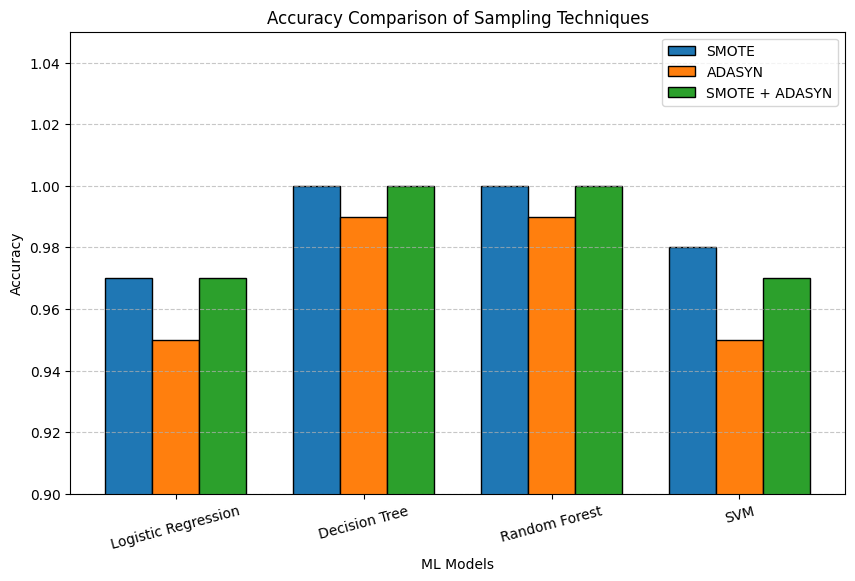

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Accuracies (update if needed)
smote_acc = [0.97, 1.00, 1.00, 0.98]
adasyn_acc = [0.95, 0.99, 0.99, 0.95]
hybrid_acc = [0.97, 1.00, 1.00, 0.97]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, smote_acc, width, label='SMOTE', edgecolor='black')
plt.bar(x, adasyn_acc, width, label='ADASYN', edgecolor='black')
plt.bar(x + width, hybrid_acc, width, label='SMOTE + ADASYN', edgecolor='black')

plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Sampling Techniques')
plt.xticks(x, models, rotation=15)
plt.ylim(0.90, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


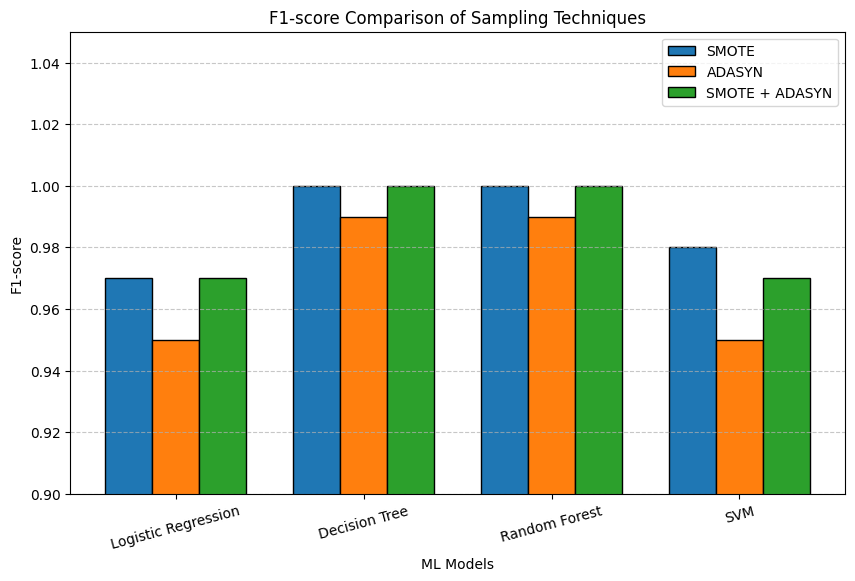

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# F1-scores (based on your results)
smote_f1 = [0.97, 1.00, 1.00, 0.98]
adasyn_f1 = [0.95, 0.99, 0.99, 0.95]
hybrid_f1 = [0.97, 1.00, 1.00, 0.97]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, smote_f1, width, label='SMOTE', edgecolor='black')
plt.bar(x, adasyn_f1, width, label='ADASYN', edgecolor='black')
plt.bar(x + width, hybrid_f1, width, label='SMOTE + ADASYN', edgecolor='black')

plt.xlabel('ML Models')
plt.ylabel('F1-score')
plt.title('F1-score Comparison of Sampling Techniques')
plt.xticks(x, models, rotation=15)
plt.ylim(0.90, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Best Model Highlight Chart**

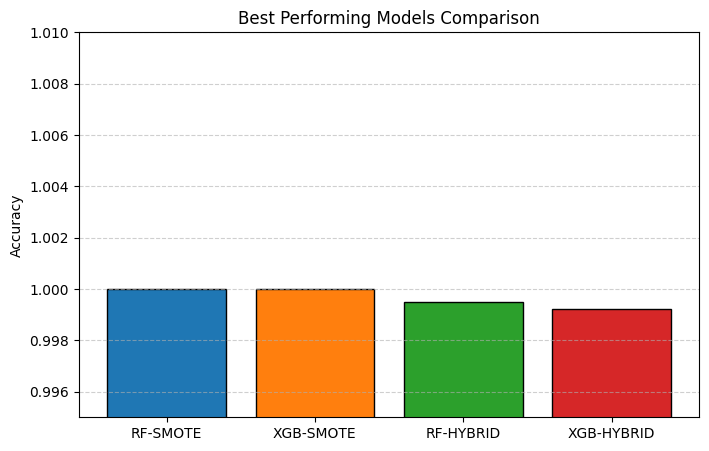

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

best_models = {
    "Model": ["RF-SMOTE", "XGB-SMOTE", "RF-HYBRID", "XGB-HYBRID"],
    "Accuracy": [1.00, 1.00, 0.9995, 0.9992]
}

df_best = pd.DataFrame(best_models)

plt.figure(figsize=(8,5))

plt.bar(
    df_best["Model"],
    df_best["Accuracy"],
    color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'],
    edgecolor='black'
)

plt.ylabel("Accuracy")
plt.title("Best Performing Models Comparison")
plt.ylim(0.995, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
